In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")

Dataset a ser analisado

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Tratamento dos dados

Nessa etapa compreende-se tarefas de limpar o conjunto de dados de treino e teste, retirando os atributos que pouco acrescentam ao modelo, como por exemplo PassengerId (vamos usar ele depois para submeter no kaggle), Ticket, Fare, Cabin, Name. Ademais, também trata-se os dados NAN, substituindo-os pela media desses valores, quando numéricos, e a moda, quando nominais 

In [10]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [11]:
test_passengerID = test["PassengerId"]
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [12]:
train.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

Nota-se que, caso retirasse todos os valores nulos, perderia-se muitos dados. Então, de primeira instância, faz-se a substituição dos valores nan pela média e moda, como citado anteriormante.

In [14]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
train["Fare"] = train["Fare"].fillna(train["Fare"].mean())

test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())


Testando se ainda há nulos

In [15]:
train.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
test.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Para tratar com os valores nominais, faz-se one hot encoding

In [17]:
train_original = train
train = pd.get_dummies(train)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
test = pd.get_dummies(test)
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [19]:
data_train = train.to_numpy()
nrow, ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

In [20]:
data_test = test.to_numpy()
X_test = data_test

checando o balanceamento das classes

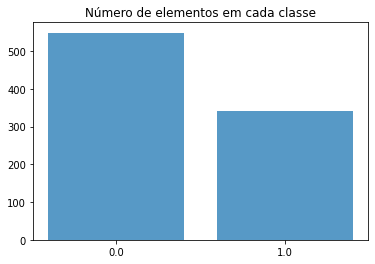

In [21]:
classes = y_train
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])

numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl, alpha=.75)
plt.xticks(numbers, cl)
plt.title("Número de elementos em cada classe")
plt.show()

Normalização dos dados

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

Análise Descritiva dos dados

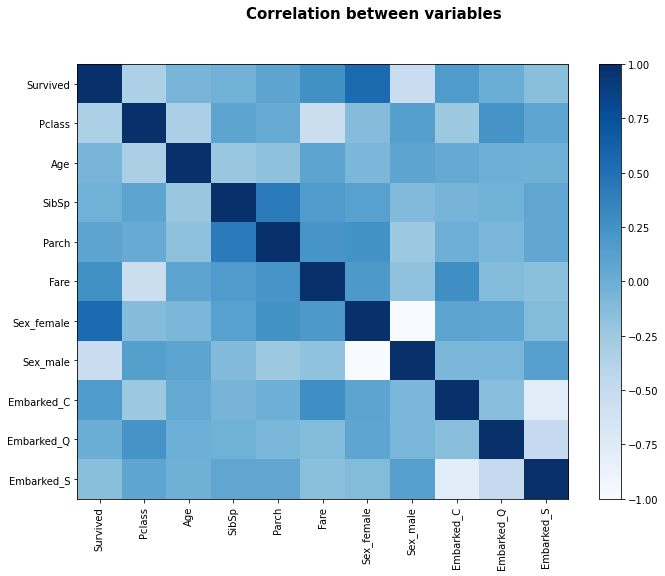

In [23]:
corr = train.corr()

plt.figure(figsize=(11,8))
plt.imshow(corr, cmap="Blues", interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle("Correlation between variables", fontweight='bold', fontsize=15)
plt.grid(False)
plt.show()

Interessantemente, é possivel notar que as mulheres tiveram uma taxa de sobrevivência de 75%, em contraste com os homens (somente 0.25%). Assim, o gênero é importante para determinar a sobrevivência.

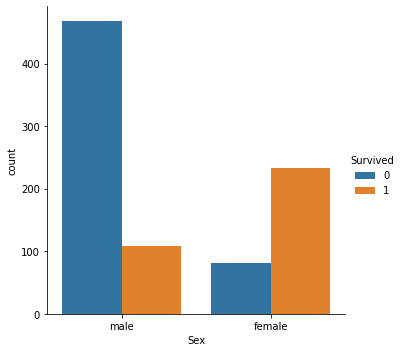

In [24]:
import seaborn as sns

sns.catplot(x='Sex', hue='Survived', kind='count', data=train_original)

É bom analisar se a classe influenciou na sobrevivência do indivíduo também.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

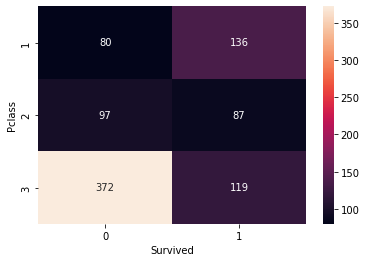

In [25]:
group = train_original.groupby(["Pclass", "Survived"])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")

Relacionando sexo e idade com sobrevivência

<AxesSubplot:xlabel='Sex', ylabel='Age'>

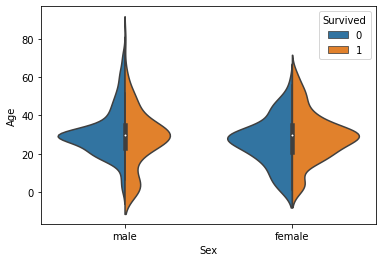

In [26]:
sns.violinplot(x="Sex", y= 'Age', hue="Survived", data=train_original, split= True)

Relacionando o preço do bilhete (classe) com sobrevivência

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

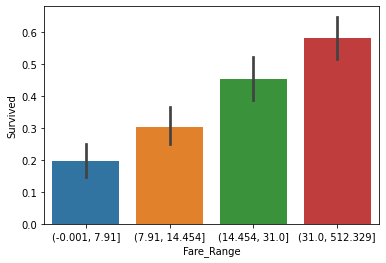

In [27]:
train_original["Fare_Range"] = pd.qcut(train_original["Fare"], 4)

sns.barplot(x = "Fare_Range", y="Survived", data= train_original)

Relacionando os portos de embarque com a sobrevivência. É pertinente fazer isso pois a maioria dos passageiros da terceira classe embarcaram em Q(Queenstown)

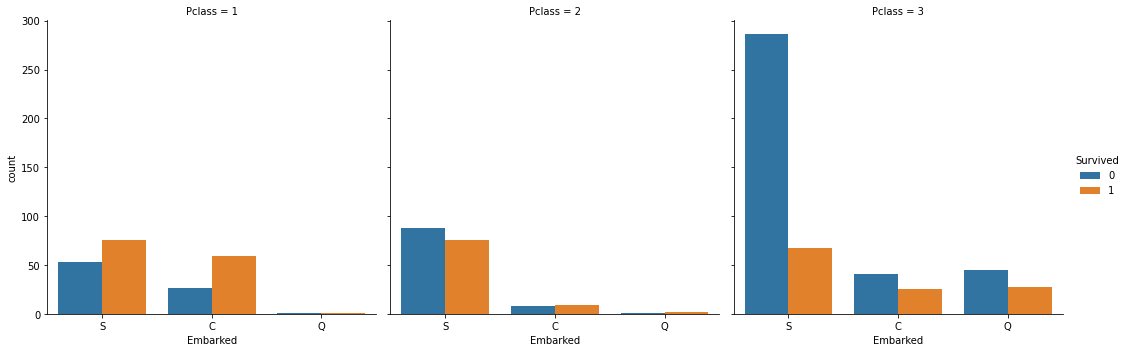

In [28]:
sns.catplot(x="Embarked", hue="Survived", kind='count', col='Pclass', data= train_original)

Com todos os dados vistos até agora, fazer uma decomposição dos modelos não é uma ideia ruim afinal, ao separar em classes diferentes, o modelo poderia compreender melhor o conjunto de dados

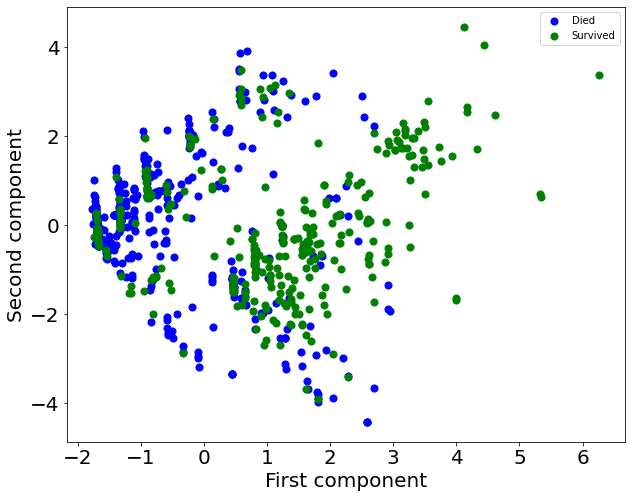

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

classes = np.unique(y_train)

colors = ['b','g', 'r', 'c', 'm', 'y', 'k', 'w' ]
aux = 0
plt.figure(figsize=(10,8))

for cl in classes:
    if cl == 1:
        lb = "Survived"
    else:
        lb = "Died"
    nodes = np.where(y_train == cl)
    plt.scatter(pca_result[nodes,0], pca_result[nodes, 1], s= 50, color= colors[aux], label= lb)
    aux += 1

plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Usando o k-means para fazer o agrupamento

In [30]:
from sklearn.cluster import KMeans

clusters = 2
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(pca_result)

predict_kmeans = kmeans.fit_predict(pca_result)

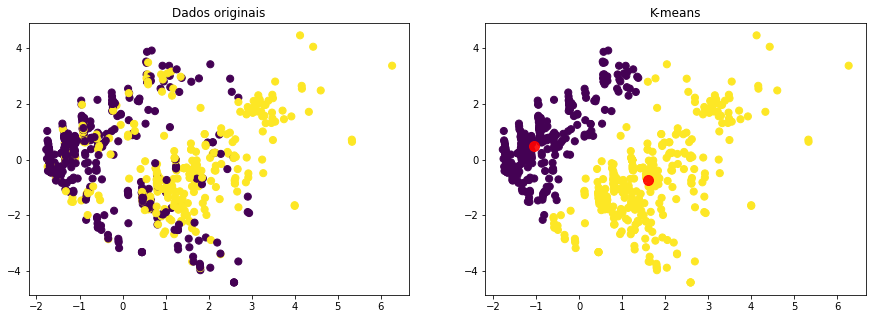

In [31]:
plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=predict_kmeans, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2, 1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train, cmap='viridis', s=50)
plt.title('Dados originais')
plt.show(True)

In [32]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print('Mutual information score:', 
      normalized_mutual_info_score(predict_kmeans, y_train, average_method='arithmetic'))

Mutual information score: 0.19006340716315032


Nota-se que a redução de dimensões pelo PCA considerando apenas dois clusters não foi muito efetiva pois perdeu muita informação do dado original, o que levaria a uma perda de desempenho do modelo

## Seleção de modelo

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1,31))

parameters = [{"n_neighbors": np.arange(1,51), "metric": ["euclidean", "minkowski", "manhattan",  "cherbyshev"]}]

model = GridSearchCV(estimator=knn, param_grid= parameters, cv=10, scoring="roc_auc", return_train_score= False, verbose=1)

model.fit(X_train, y_train)
print(model.best_estimator_)
model.score(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


KNeighborsClassifier(metric='manhattan', n_neighbors=9)


c:\Users\davif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\davif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\davif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\davif\AppData\Local\Programs\Python\Python310\lib\site-packages\s

0.9182032190372714

In [34]:
y_pred=model.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = test_passengerID
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-knn.csv', index = False)

Resultado: 0.76076 de precisão

## Testando outros modelos

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

Melhor n: 13  AUC: 0.8068241235888296


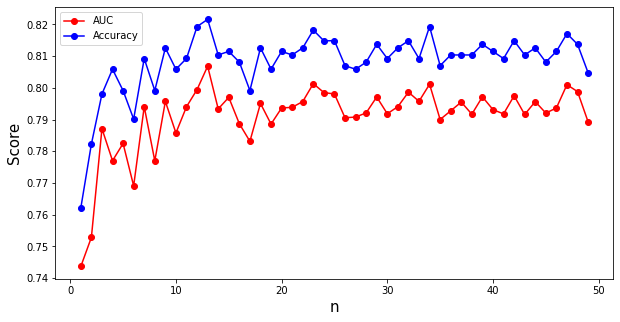

In [44]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X_train, y_train):
        # select rows
        x_t, x_validation = X_train[train_index], X_train[test_index]
        y_t, y_validation = y_train[train_index], y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation) 
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [45]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = test_passengerID
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF.csv', index = False)

Mesma precisão: 0.76076

In [49]:
# testando coisas
random_forest = RandomForestClassifier()
parameters = [{"n_estimators" : np.arange(1,100),"criterion":["gini", "entropy", "log_loss"] }]

model = GridSearchCV(estimator= random_forest, param_grid=parameters, cv=10, scoring="roc_auc", return_train_score= False, verbose= 1)

In [50]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype=int)
prediction = pd.DataFrame()
prediction["PassengerId"] = test_passengerID
prediction["Survived"] = y_pred

prediction.to_csv('Titanic-RF.csv', index=False)

Fitting 10 folds for each of 297 candidates, totalling 2970 fits


In [51]:
print(model.best_estimator_)

RandomForestClassifier(criterion='log_loss', n_estimators=31)
